In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Data Path

In [14]:
# Epoch-based models
rf = pd.read_csv('/kaggle/input/model-result/RF_model_results.csv')

byol = pd.read_csv('/kaggle/input/model-result/byol_ssl_rf_results_all_epochs.csv')
dino = pd.read_csv('/kaggle/input/model-result/dino_ssl_rf_results_all_epochs.csv')
simclr = pd.read_csv('/kaggle/input/model-result/simclr_ssl_rf_results_all_epochs.csv')

moco = pd.read_csv('/kaggle/input/model-result/moco_RF_results_all_epochs.csv')
moco_LR = pd.read_csv('/kaggle/input/model-result/moco_logreg_results.csv')
moco_SVM = pd.read_csv('/kaggle/input/model-result/moco_svm_results.csv')
moco_XgBoost = pd.read_csv('/kaggle/input/model-result/moco_xgboost_results.csv')

simclr_rf = pd.read_csv('/kaggle/input/sim-clr-result/simclr_ssl_rf_results_all_epochs.csv')
simclr_lr = pd.read_csv('/kaggle/input/sim-clr-result/simclr_linear_unsw_results.csv')
simclr_svm = pd.read_csv('/kaggle/input/sim-clr-result/sim_clr_svm_results.csv')
simclr_xgb = pd.read_csv('/kaggle/input/sim-clr-result/simclr_xgboost_unsw_results.csv')


Downstream Classifier use as Random Forest (All Model-->RF, MoCo, SimCLR, Byol, Dino)

/tmp/ipykernel_36/4027780490.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_36/4027780490.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_36/4027780490.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and

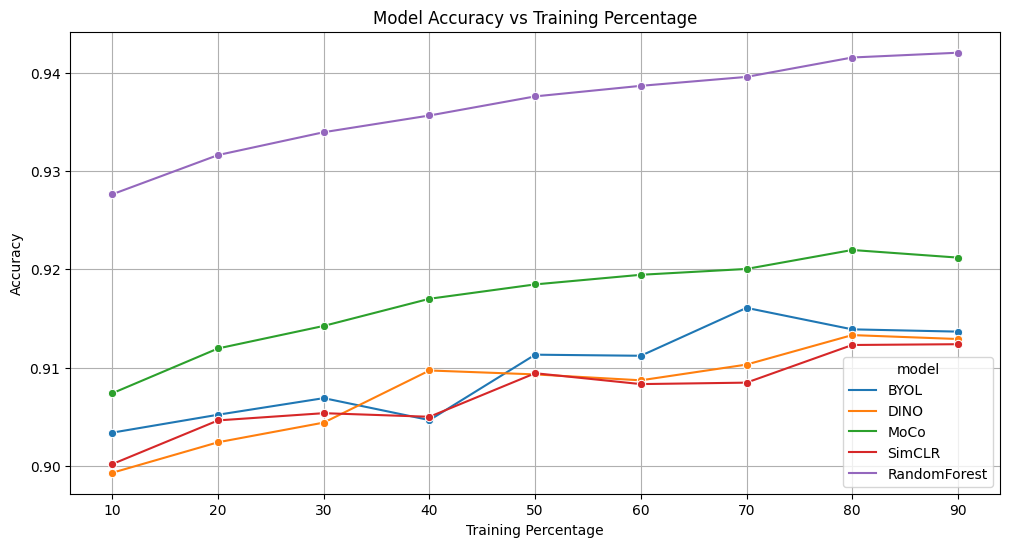

In [15]:
def extract_best(df, model_name):
    best = df.groupby(['train_pct', 'test_pct']).apply(
        lambda g: g.loc[g['accuracy'].idxmax()]
    ).reset_index(drop=True)
    best['model'] = model_name
    return best[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]

# Extract the best results for each model
byol_best = extract_best(byol, 'BYOL')
dino_best = extract_best(dino, 'DINO')
moco_best = extract_best(moco, 'MoCo')
simclr_best = extract_best(simclr, 'SimCLR')

# RF Data Preparation
rf[['train_pct', 'test_pct']] = rf['Unnamed: 0'].str.split(':', expand=True).astype(int)
rf.rename(columns={'f1_0': 'f1_class_0', 'f1_1': 'f1_class_1'}, inplace=True)
rf['model'] = 'RandomForest'
rf = rf[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]

# Combine all best results into one DataFrame
all_models = pd.concat([
    byol_best, dino_best, moco_best, simclr_best, rf
], ignore_index=True)

# Plot model accuracy vs training percentage
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_models, x='train_pct', y='accuracy', hue='model', marker='o')
plt.title("Model Accuracy vs Training Percentage")
plt.xlabel("Training Percentage")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


F1 Score

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

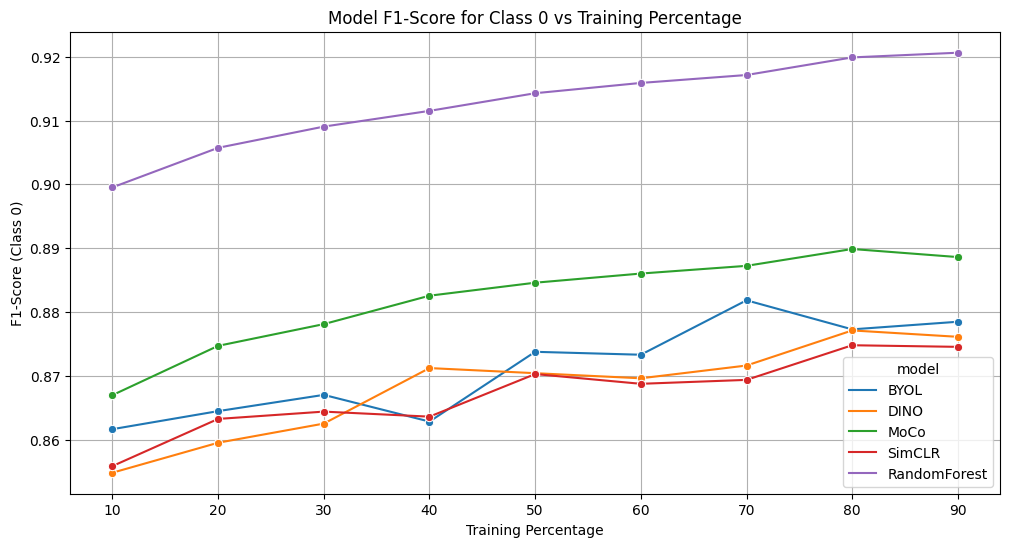

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

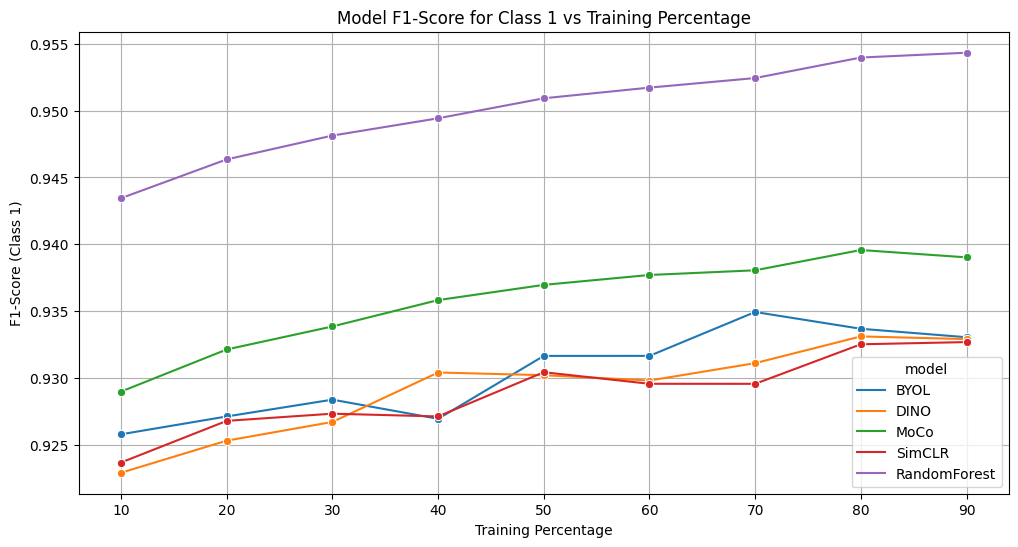

In [16]:
# Plot F1-score for Class 0
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_models, x='train_pct', y='f1_class_0', hue='model', marker='o')
plt.title("Model F1-Score for Class 0 vs Training Percentage")
plt.xlabel("Training Percentage")
plt.ylabel("F1-Score (Class 0)")
plt.grid(True)
plt.show()

# Plot F1-score for Class 1
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_models, x='train_pct', y='f1_class_1', hue='model', marker='o')
plt.title("Model F1-Score for Class 1 vs Training Percentage")
plt.xlabel("Training Percentage")
plt.ylabel("F1-Score (Class 1)")
plt.grid(True)
plt.show()

Only Best Moco(RF)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


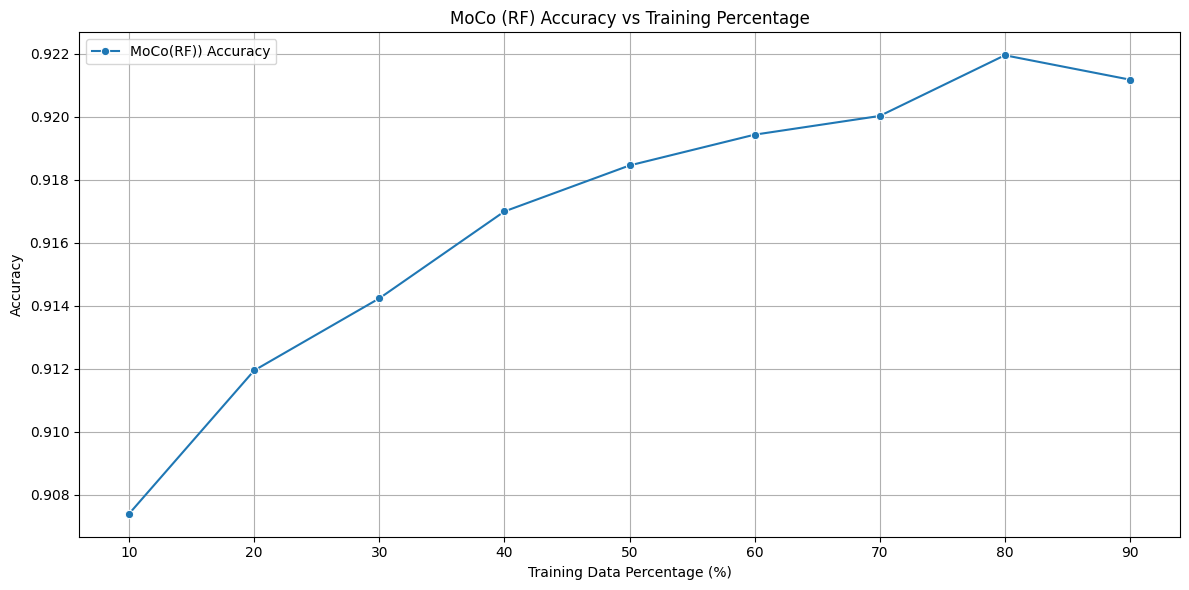

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract only the best accuracy for MoCo from the moco_best DataFrame
moco_best_accuracy = moco_best[['train_pct', 'accuracy']]

# Plot the MoCo best accuracy curve
plt.figure(figsize=(12, 6))
sns.lineplot(data=moco_best_accuracy, x='train_pct', y='accuracy', marker='o', label='MoCo(RF)) Accuracy')
plt.title("MoCo (RF) Accuracy vs Training Percentage")
plt.xlabel("Training Data Percentage (%)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# Extract the best results for MoCo from the moco_best DataFrame
moco_best_results = moco_best[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1']]

# Display the best MoCo results
print(moco_best_results)


   train_pct  test_pct  accuracy  f1_class_0  f1_class_1
0       10.0      90.0  0.907389    0.866960    0.928973
1       20.0      80.0  0.911943    0.874684    0.932124
2       30.0      70.0  0.914233    0.878089    0.933846
3       40.0      60.0  0.916994    0.882545    0.935819
4       50.0      50.0  0.918455    0.884580    0.936958
5       60.0      40.0  0.919433    0.886015    0.937699
6       70.0      30.0  0.920028    0.887223    0.938049
7       80.0      20.0  0.921956    0.889863    0.939566
8       90.0      10.0  0.921181    0.888596    0.939018


MoCo(RF) Each Epoch Validation accuracy

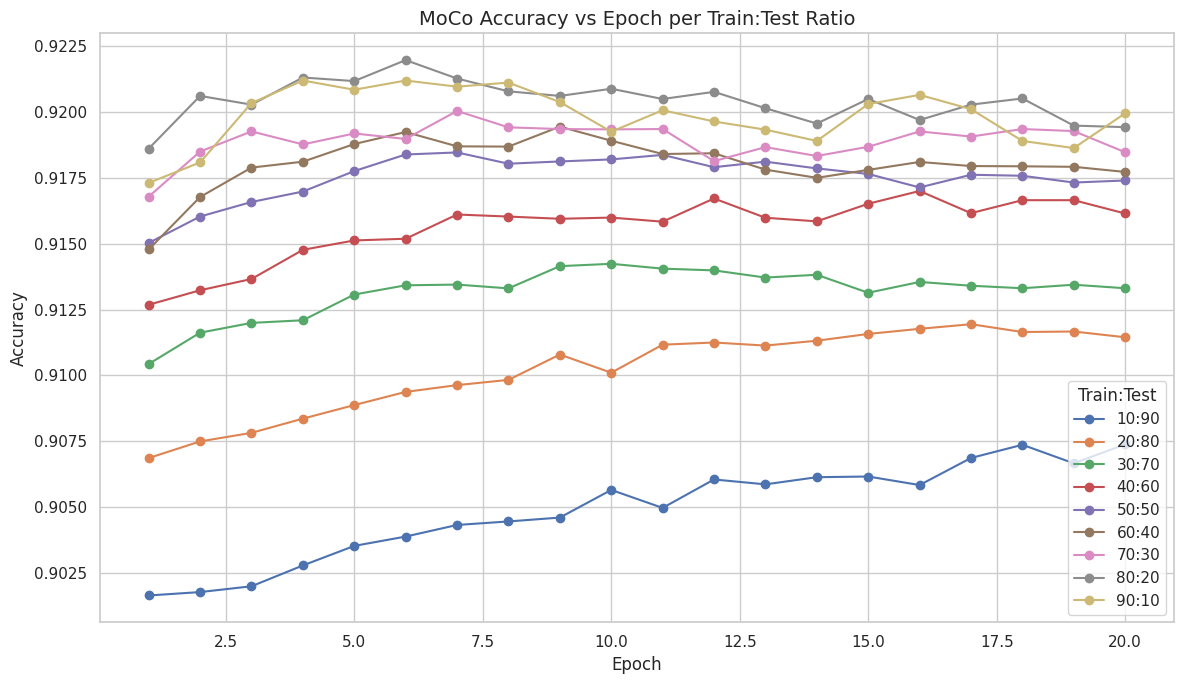

In [50]:
import pandas as pd

# Load the dataset into a DataFrame (replace with your actual file path)
results_df = pd.read_csv('/kaggle/input/model-result/moco_RF_results_all_epochs.csv')

# Now you can proceed with the rest of your code
ratios_unique = results_df[['train_pct', 'test_pct']].drop_duplicates()

# Accuracy vs Epoch Plot
plt.figure(figsize=(12, 7))

# Loop through each unique train-test ratio
for _, row in ratios_unique.iterrows():
    # Subset data for this specific train-test ratio
    subset = results_df[
        (results_df['train_pct'] == row['train_pct']) & 
        (results_df['test_pct'] == row['test_pct'])
    ]
    
    # Create label for the legend (Train:Test ratio)
    label = f"{int(row['train_pct'])}:{int(row['test_pct'])}"
    
    # Plot the accuracy for this ratio against epochs
    plt.plot(subset['epoch'], subset['accuracy'], marker='o', label=label)

# Add titles and labels
plt.title("MoCo Accuracy vs Epoch per Train:Test Ratio", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

# Show the legend with titles for clarity
plt.legend(title="Train:Test", loc="best")

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Moco(RF, SVM, LR, XgBoost)

In [52]:
moco_rf = pd.read_csv('/kaggle/input/model-result/moco_RF_results_all_epochs.csv')
moco_lr = pd.read_csv('/kaggle/input/model-result/moco_logreg_results.csv')
moco_svm = pd.read_csv('/kaggle/input/model-result/moco_svm_results.csv')
moco_xgb = pd.read_csv('/kaggle/input/model-result/moco_xgboost_results.csv')

/tmp/ipykernel_36/813336842.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_36/813336842.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_36/813336842.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

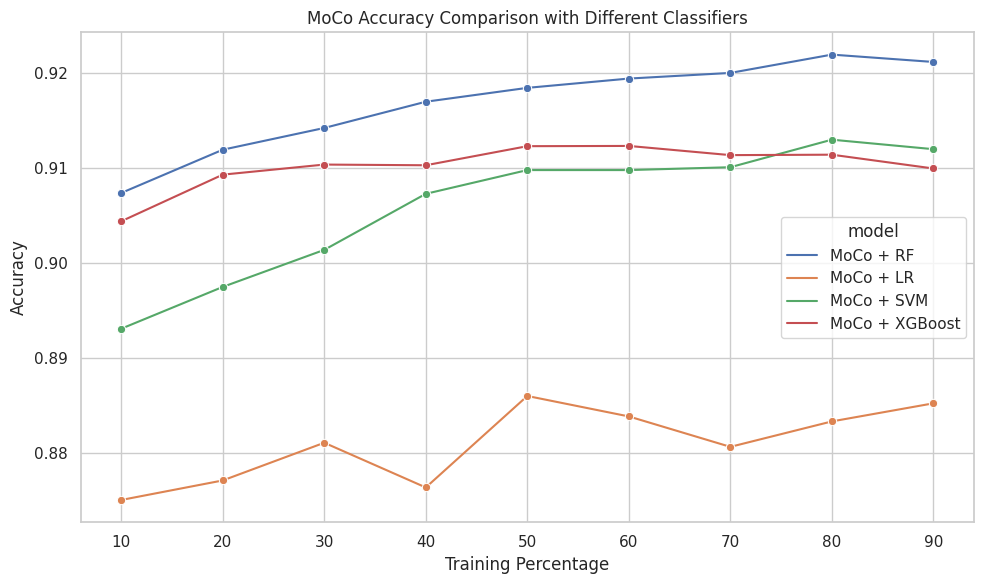

In [53]:
def extract_moco_best(df, name):
    # Rename f1_0 and f1_1 to f1_class_0 and f1_class_1 for consistency
    df.rename(columns={'f1_0': 'f1_class_0', 'f1_1': 'f1_class_1'}, inplace=True)
    
    best = df.groupby(['train_pct', 'test_pct']).apply(
        lambda g: g.loc[g['accuracy'].idxmax()]
    ).reset_index(drop=True)
    best['model'] = name
    return best[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]


# Extract best accuracy for each classifier
rf_best = extract_moco_best(moco_rf, 'MoCo + RF')
lr_best = extract_moco_best(moco_lr, 'MoCo + LR')
svm_best = extract_moco_best(moco_svm, 'MoCo + SVM')
xgb_best = extract_moco_best(moco_xgb, 'MoCo + XGBoost')

# Combine
moco_all = pd.concat([rf_best, lr_best, svm_best, xgb_best], ignore_index=True)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=moco_all, x='train_pct', y='accuracy', hue='model', marker='o')
plt.title('MoCo Accuracy Comparison with Different Classifiers')
plt.xlabel('Training Percentage')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

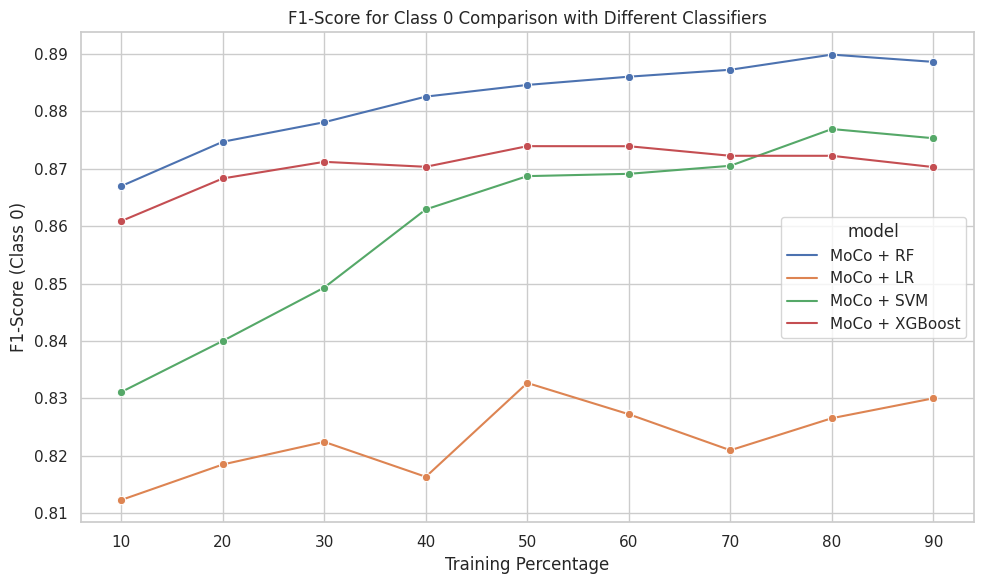

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

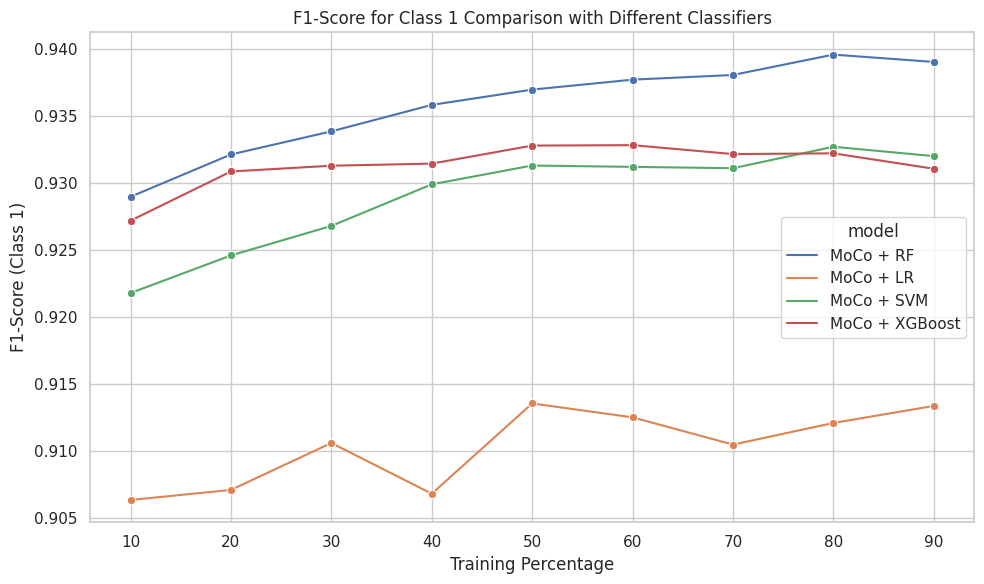

In [54]:
# Plot F1-score for Class 0
plt.figure(figsize=(10, 6))
sns.lineplot(data=moco_all, x='train_pct', y='f1_class_0', hue='model', marker='o')
plt.title('F1-Score for Class 0 Comparison with Different Classifiers')
plt.xlabel('Training Percentage')
plt.ylabel('F1-Score (Class 0)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot F1-score for Class 1
plt.figure(figsize=(10, 6))
sns.lineplot(data=moco_all, x='train_pct', y='f1_class_1', hue='model', marker='o')
plt.title('F1-Score for Class 1 Comparison with Different Classifiers')
plt.xlabel('Training Percentage')
plt.ylabel('F1-Score (Class 1)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
from IPython.display import display
display(rf_best)
display(lr_best)
display(svm_best)
display(xgb_best)




,train_pct,test_pct,accuracy,f1_class_0,f1_class_1,model
0,10.0,90.0,0.907389,0.866960,0.928973,MoCo + RF
1,20.0,80.0,0.911943,0.874684,0.932124,MoCo + RF
2,30.0,70.0,0.914233,0.878089,0.933846,MoCo + RF
3,40.0,60.0,0.916994,0.882545,0.935819,MoCo + RF
4,50.0,50.0,0.918455,0.884580,0.936958,MoCo + RF
5,60.0,40.0,0.919433,0.886015,0.937699,MoCo + RF
6,70.0,30.0,0.920028,0.887223,0.938049,MoCo + RF
7,80.0,20.0,0.921956,0.889863,0.939566,MoCo + RF
8,90.0,10.0,0.921181,0.888596,0.939018,MoCo + RF


,train_pct,test_pct,accuracy,f1_class_0,f1_class_1,model
0,10.0,90.0,0.875070,0.812302,0.906378,MoCo + LR
1,20.0,80.0,0.877127,0.818483,0.907130,MoCo + LR
2,30.0,70.0,0.881096,0.822422,0.910626,MoCo + LR
3,40.0,60.0,0.876387,0.816338,0.906845,MoCo + LR
4,50.0,50.0,0.886019,0.832678,0.913571,MoCo + LR
5,60.0,40.0,0.883865,0.827233,0.912536,MoCo + LR
6,70.0,30.0,0.880663,0.820961,0.910506,MoCo + LR
7,80.0,20.0,0.883341,0.826544,0.912118,MoCo + LR
8,90.0,10.0,0.885245,0.830009,0.913389,MoCo + LR


,train_pct,test_pct,accuracy,f1_class_0,f1_class_1,model
0,10.0,90.0,0.8931,0.8311,0.9218,MoCo + SVM
1,20.0,80.0,0.8975,0.8400,0.9246,MoCo + SVM
2,30.0,70.0,0.9014,0.8493,0.9268,MoCo + SVM
3,40.0,60.0,0.9073,0.8629,0.9299,MoCo + SVM
4,50.0,50.0,0.9098,0.8687,0.9313,MoCo + SVM
5,60.0,40.0,0.9098,0.8691,0.9312,MoCo + SVM
6,70.0,30.0,0.9101,0.8705,0.9311,MoCo + SVM
7,80.0,20.0,0.9130,0.8769,0.9327,MoCo + SVM
8,90.0,10.0,0.9120,0.8753,0.9320,MoCo + SVM


,train_pct,test_pct,accuracy,f1_class_0,f1_class_1,model
0,10.0,90.0,0.904410,0.860871,0.927193,MoCo + XGBoost
1,20.0,80.0,0.909318,0.868293,0.930856,MoCo + XGBoost
2,30.0,70.0,0.910380,0.871190,0.931286,MoCo + XGBoost
3,40.0,60.0,0.910306,0.870326,0.931443,MoCo + XGBoost
4,50.0,50.0,0.912316,0.873919,0.932785,MoCo + XGBoost
5,60.0,40.0,0.912341,0.873906,0.932819,MoCo + XGBoost
6,70.0,30.0,0.911374,0.872242,0.932154,MoCo + XGBoost
7,80.0,20.0,0.911419,0.872240,0.932209,MoCo + XGBoost
8,90.0,10.0,0.909966,0.870275,0.931059,MoCo + XGBoost


HeatMap

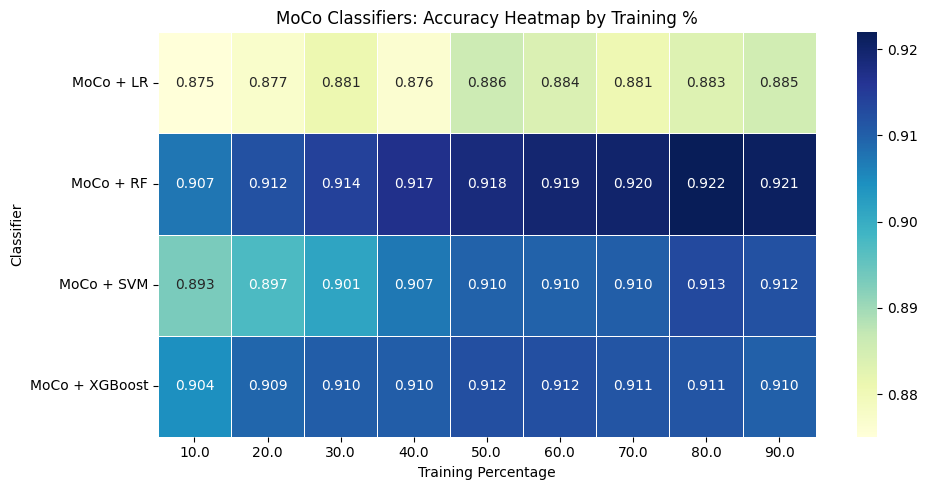

In [33]:
# Pivot table
pivot = moco_all.pivot_table(index='model', columns='train_pct', values='accuracy')

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu", linewidths=0.5)
plt.title("MoCo Classifiers: Accuracy Heatmap by Training %")
plt.xlabel("Training Percentage")
plt.ylabel("Classifier")
plt.tight_layout()
plt.show()

SimCLR(RF,SVM,XgBoost,LR)

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Load SimCLR classifier results
simclr_rf = pd.read_csv('/kaggle/input/sim-clr-result/simclr_ssl_rf_results_all_epochs.csv')
simclr_lr = pd.read_csv('/kaggle/input/sim-clr-result/simclr_linear_unsw_results.csv')
simclr_svm = pd.read_csv('/kaggle/input/sim-clr-result/sim_clr_svm_results.csv')
simclr_xgb = pd.read_csv('/kaggle/input/sim-clr-result/simclr_xgboost_unsw_results.csv')

In [70]:
# Standardize column names for LR and XGB
for df in [simclr_lr, simclr_xgb]:
    df.rename(columns={'train_ratio': 'train_pct'}, inplace=True)
    df['test_pct'] = 100 - df['train_pct']
    df['epoch'] = 0  # if missing, just fill with dummy
    df['model'] = 'temp'  # will be overwritten
    if 'f1_class_0' not in df.columns:
        df['f1_class_0'] = None
    if 'f1_class_1' not in df.columns:
        df['f1_class_1'] = None

# Fix column names for SVM
simclr_svm.rename(columns={'f1_0': 'f1_class_0', 'f1_1': 'f1_class_1'}, inplace=True)

In [71]:
def extract_best(df, name):
    best = df.groupby(['train_pct', 'test_pct'], group_keys=False).apply(
        lambda g: g.loc[g['accuracy'].idxmax()]
    ).reset_index(drop=True)
    best['model'] = name
    return best[['train_pct', 'test_pct', 'accuracy', 'model']]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


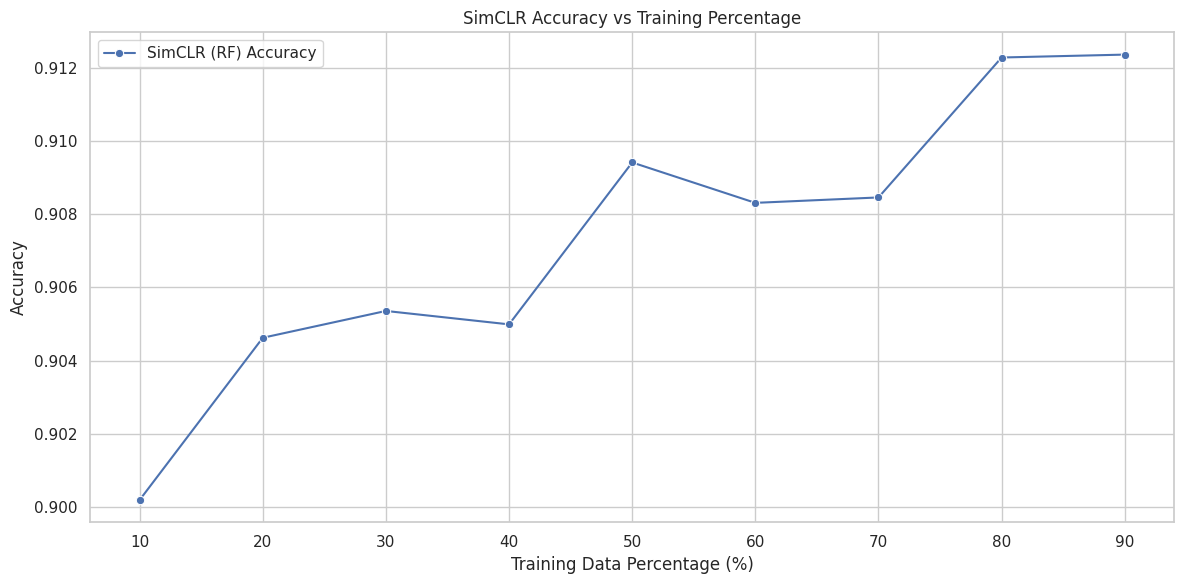

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract only the best accuracy for SimCLR from the simclr_best DataFrame
simclr_best_accuracy = simclr_best[['train_pct', 'accuracy']]

# Plot the SimCLR best accuracy curve
plt.figure(figsize=(12, 6))
sns.lineplot(data=simclr_best_accuracy, x='train_pct', y='accuracy', marker='o', label='SimCLR (RF) Accuracy')
plt.title("SimCLR Accuracy vs Training Percentage")
plt.xlabel("Training Data Percentage (%)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


In [74]:
# Extract the best results for MoCo from the moco_best DataFrame
simclr_best_results = simclr_best[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1']]

# Display the best MoCo results
print(simclr_best_results)

   train_pct  test_pct  accuracy  f1_class_0  f1_class_1
0       10.0      90.0  0.900184    0.855839    0.923665
1       20.0      80.0  0.904623    0.863231    0.926781
2       30.0      70.0  0.905357    0.864377    0.927318
3       40.0      60.0  0.904990    0.863588    0.927112
4       50.0      50.0  0.909420    0.870261    0.930421
5       60.0      40.0  0.908315    0.868735    0.929555
6       70.0      30.0  0.908463    0.869350    0.929553
7       80.0      20.0  0.912293    0.874778    0.932511
8       90.0      10.0  0.912372    0.874528    0.932677


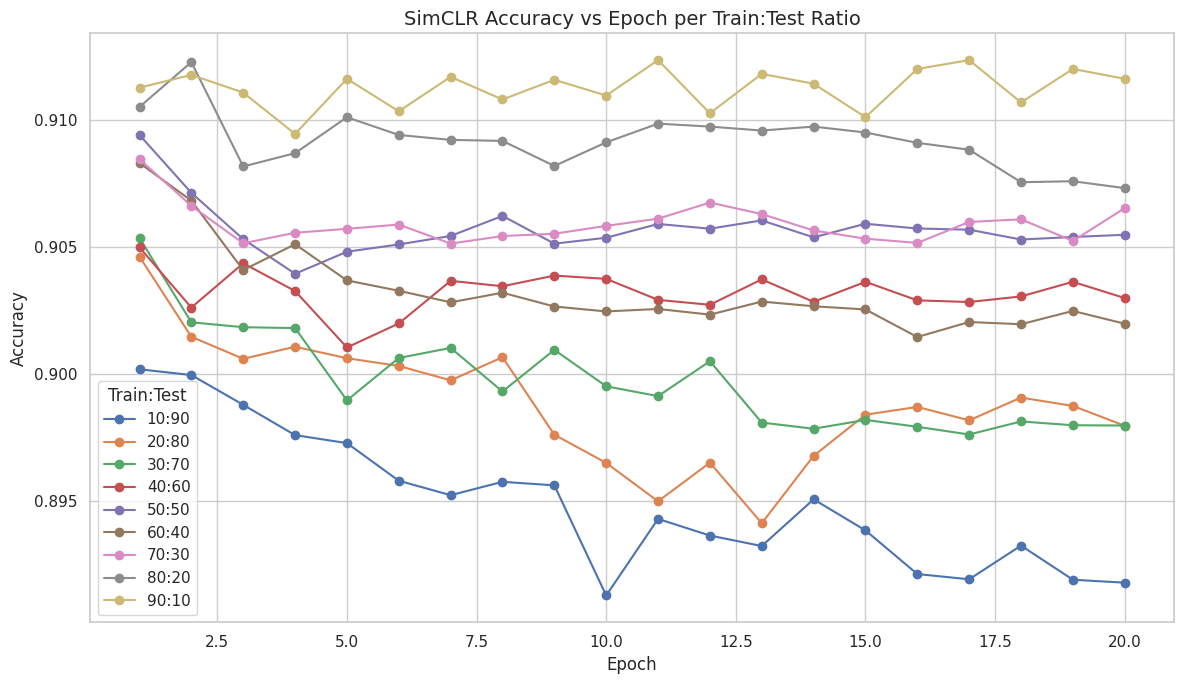

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the SimCLR dataset into a DataFrame (replace with your actual file path)
simclr_results_df = pd.read_csv('/kaggle/input/sim-clr-result/simclr_ssl_rf_results_all_epochs.csv')

# Get unique train-test ratios
ratios_unique = simclr_results_df[['train_pct', 'test_pct']].drop_duplicates()

# Accuracy vs Epoch Plot for SimCLR
plt.figure(figsize=(12, 7))

# Loop through each unique train-test ratio
for _, row in ratios_unique.iterrows():
    # Subset data for this specific train-test ratio
    subset = simclr_results_df[
        (simclr_results_df['train_pct'] == row['train_pct']) & 
        (simclr_results_df['test_pct'] == row['test_pct'])
    ]
    
    # Create label for the legend (Train:Test ratio)
    label = f"{int(row['train_pct'])}:{int(row['test_pct'])}"
    
    # Plot the accuracy for this ratio against epochs
    plt.plot(subset['epoch'], subset['accuracy'], marker='o', label=label)

# Add titles and labels
plt.title("SimCLR Accuracy vs Epoch per Train:Test Ratio", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

# Show the legend with titles for clarity
plt.legend(title="Train:Test", loc="best")

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_36/949788911.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_36/949788911.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_36/949788911.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

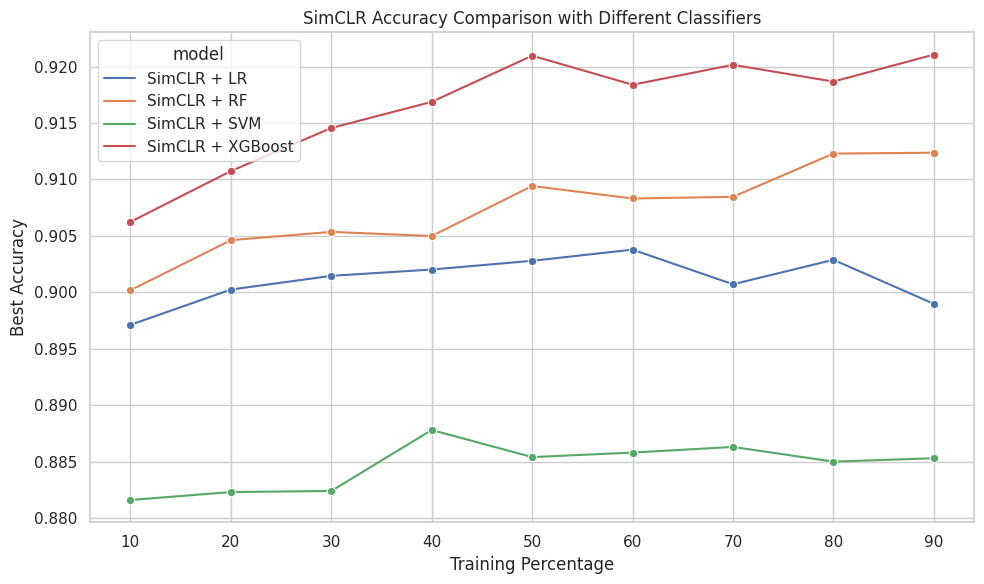

In [87]:
# Function to extract best results (accuracy and F1 scores)
def extract_simclr_best(df, name):
    # Rename f1_0 and f1_1 to f1_class_0 and f1_class_1 for consistency
    df.rename(columns={'f1_0': 'f1_class_0', 'f1_1': 'f1_class_1'}, inplace=True)
    
    # Group by train_pct and test_pct, then get the row with the highest accuracy
    best = df.groupby(['train_pct', 'test_pct']).apply(
        lambda g: g.loc[g['accuracy'].idxmax()]
    ).reset_index(drop=True)
    best['model'] = name
    return best[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]

# Extract best accuracy and F1 scores for each classifier
rf_best = extract_simclr_best(simclr_rf, 'SimCLR + RF')
lr_best = extract_simclr_best(simclr_lr, 'SimCLR + LR')
svm_best = extract_simclr_best(simclr_svm, 'SimCLR + SVM')
xgb_best = extract_simclr_best(simclr_xgb, 'SimCLR + XGBoost')

# Combine all classifiers' best results into one DataFrame
simclr_all = pd.concat([rf_best, lr_best, svm_best, xgb_best], ignore_index=True)

# Sort the combined data
simclr_all.sort_values(by=['model', 'train_pct'], inplace=True)

# Plot the best accuracy for all classifiers
plt.figure(figsize=(10, 6))
sns.lineplot(data=simclr_all, x='train_pct', y='accuracy', hue='model', marker='o')
plt.title('SimCLR Accuracy Comparison with Different Classifiers')
plt.xlabel('Training Percentage')
plt.ylabel('Best Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_36/2551475042.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_36/2551475042.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_36/2551475042.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, 

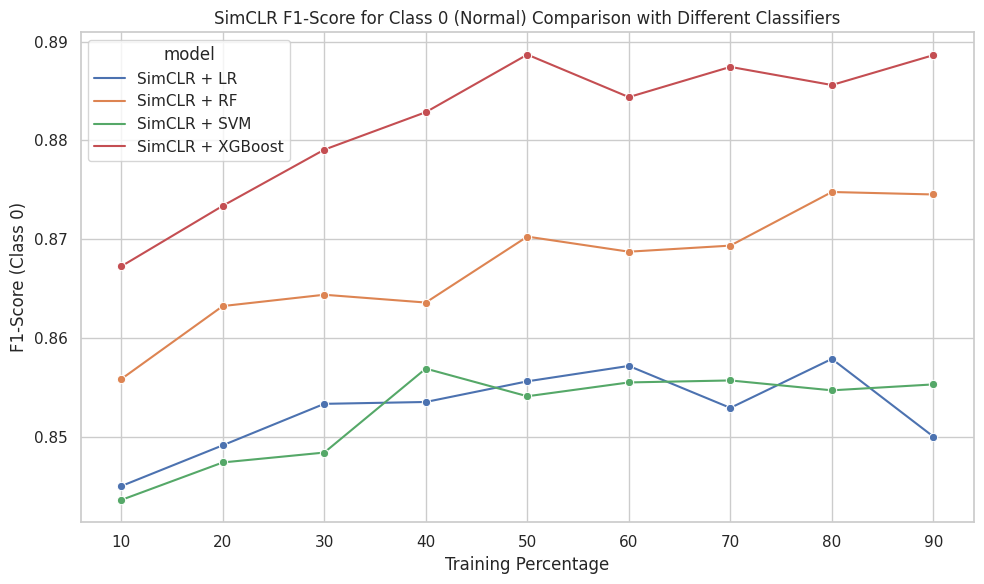

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

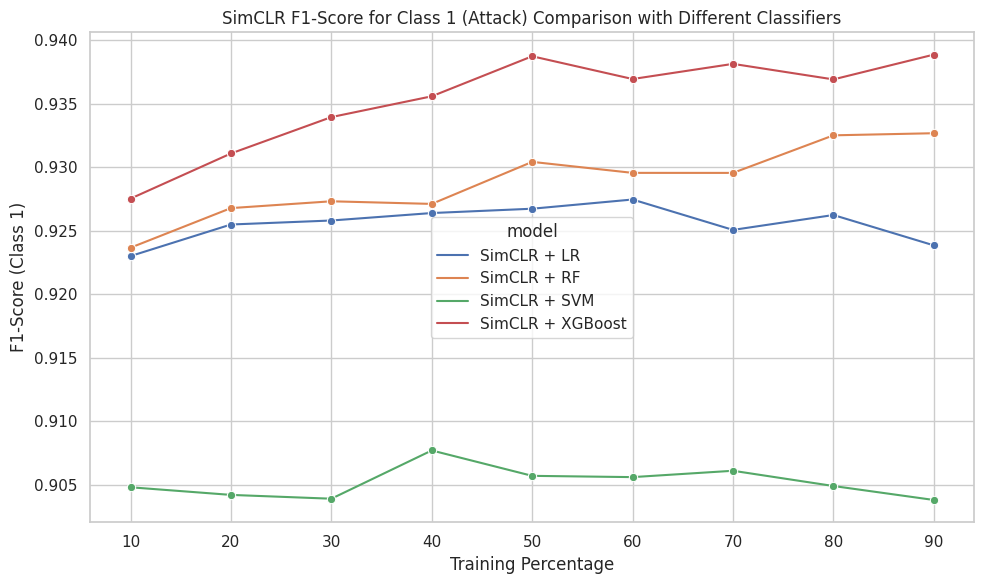

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract best results (accuracy and F1 scores)
def extract_simclr_best(df, name):
    # Rename f1_0 and f1_1 to f1_class_0 and f1_class_1 for consistency
    df.rename(columns={'f1_0': 'f1_class_0', 'f1_1': 'f1_class_1'}, inplace=True)
    
    # Group by train_pct and test_pct, then get the row with the highest accuracy
    best = df.groupby(['train_pct', 'test_pct']).apply(
        lambda g: g.loc[g['accuracy'].idxmax()]
    ).reset_index(drop=True)
    best['model'] = name
    return best[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]

# Extract best accuracy and F1 scores for each classifier
rf_best = extract_simclr_best(simclr_rf, 'SimCLR + RF')
lr_best = extract_simclr_best(simclr_lr, 'SimCLR + LR')
svm_best = extract_simclr_best(simclr_svm, 'SimCLR + SVM')
xgb_best = extract_simclr_best(simclr_xgb, 'SimCLR + XGBoost')

# Combine all classifiers' best results into one DataFrame
simclr_all = pd.concat([rf_best, lr_best, svm_best, xgb_best], ignore_index=True)

# Sort the combined data
simclr_all.sort_values(by=['model', 'train_pct'], inplace=True)

# Plot F1-Score for Class 0 (Normal)
plt.figure(figsize=(10, 6))
sns.lineplot(data=simclr_all, x='train_pct', y='f1_class_0', hue='model', marker='o')

plt.title('SimCLR F1-Score for Class 0 (Normal) Comparison with Different Classifiers')
plt.xlabel('Training Percentage')
plt.ylabel('F1-Score (Class 0)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot F1-Score for Class 1 (Attack)
plt.figure(figsize=(10, 6))
sns.lineplot(data=simclr_all, x='train_pct', y='f1_class_1', hue='model', marker='o')

plt.title('SimCLR F1-Score for Class 1 (Attack) Comparison with Different Classifiers')
plt.xlabel('Training Percentage')
plt.ylabel('F1-Score (Class 1)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
from IPython.display import display
display(rf_best)
display(lr_best)
display(svm_best)
display(xgb_best)

,train_pct,test_pct,accuracy,f1_class_0,f1_class_1,model
0,10.0,90.0,0.900184,0.855839,0.923665,SimCLR + RF
1,20.0,80.0,0.904623,0.863231,0.926781,SimCLR + RF
2,30.0,70.0,0.905357,0.864377,0.927318,SimCLR + RF
3,40.0,60.0,0.904990,0.863588,0.927112,SimCLR + RF
4,50.0,50.0,0.909420,0.870261,0.930421,SimCLR + RF
5,60.0,40.0,0.908315,0.868735,0.929555,SimCLR + RF
6,70.0,30.0,0.908463,0.869350,0.929553,SimCLR + RF
7,80.0,20.0,0.912293,0.874778,0.932511,SimCLR + RF
8,90.0,10.0,0.912372,0.874528,0.932677,SimCLR + RF


,train_pct,test_pct,accuracy,f1_class_0,f1_class_1,model
0,10,90,0.897118,0.845006,0.923005,SimCLR + LR
1,20,80,0.900247,0.849135,0.925490,SimCLR + LR
2,30,70,0.901459,0.853333,0.925805,SimCLR + LR
3,40,60,0.902021,0.853521,0.926392,SimCLR + LR
4,50,50,0.902792,0.855611,0.926733,SimCLR + LR
5,60,40,0.903784,0.857172,0.927458,SimCLR + LR
6,70,30,0.900714,0.852921,0.925064,SimCLR + LR
7,80,20,0.902882,0.857881,0.926238,SimCLR + LR
8,90,10,0.898983,0.850014,0.923847,SimCLR + LR


,train_pct,test_pct,accuracy,f1_class_0,f1_class_1,model
0,10.0,90.0,0.8816,0.8436,0.9048,SimCLR + SVM
1,20.0,80.0,0.8823,0.8474,0.9042,SimCLR + SVM
2,30.0,70.0,0.8824,0.8484,0.9039,SimCLR + SVM
3,40.0,60.0,0.8878,0.8569,0.9077,SimCLR + SVM
4,50.0,50.0,0.8854,0.8541,0.9057,SimCLR + SVM
5,60.0,40.0,0.8858,0.8555,0.9056,SimCLR + SVM
6,70.0,30.0,0.8863,0.8557,0.9061,SimCLR + SVM
7,80.0,20.0,0.8850,0.8547,0.9049,SimCLR + SVM
8,90.0,10.0,0.8853,0.8553,0.9038,SimCLR + SVM


,train_pct,test_pct,accuracy,f1_class_0,f1_class_1,model
0,10,90,0.906242,0.867253,0.927528,SimCLR + XGBoost
1,20,80,0.910745,0.873378,0.931082,SimCLR + XGBoost
2,30,70,0.914560,0.879064,0.933947,SimCLR + XGBoost
3,40,60,0.916878,0.882859,0.935585,SimCLR + XGBoost
4,50,50,0.920970,0.888687,0.938737,SimCLR + XGBoost
5,60,40,0.918395,0.884383,0.936945,SimCLR + XGBoost
6,70,30,0.920157,0.887442,0.938138,SimCLR + XGBoost
7,80,20,0.918677,0.885607,0.936914,SimCLR + XGBoost
8,90,10,0.921065,0.888633,0.938868,SimCLR + XGBoost


Histogram: Accuracy Distribution per Classifier

HeatMap

/tmp/ipykernel_36/2551475042.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_36/2551475042.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_36/2551475042.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, 

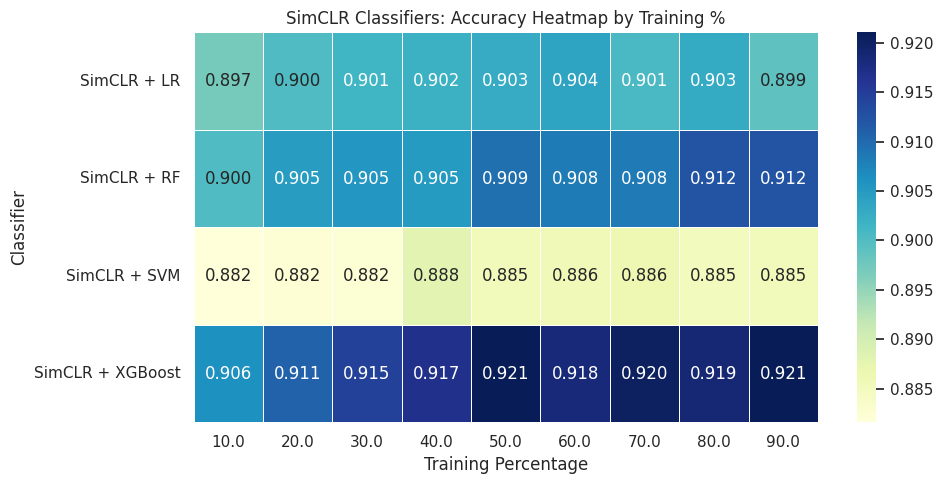

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract best results for each classifier (SimCLR models)
rf_best = extract_simclr_best(simclr_rf, 'SimCLR + RF')
lr_best = extract_simclr_best(simclr_lr, 'SimCLR + LR')
svm_best = extract_simclr_best(simclr_svm, 'SimCLR + SVM')
xgb_best = extract_simclr_best(simclr_xgb, 'SimCLR + XGBoost')

# Combine the results into one DataFrame
simclr_all = pd.concat([rf_best, lr_best, svm_best, xgb_best], ignore_index=True)

# Pivot table for accuracy
pivot = simclr_all.pivot_table(index='model', columns='train_pct', values='accuracy')

# Plot heatmap for accuracy
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu", linewidths=0.5)
plt.title("SimCLR Classifiers: Accuracy Heatmap by Training %")
plt.xlabel("Training Percentage")
plt.ylabel("Classifier")
plt.tight_layout()
plt.show()


Combine MoCo & SimCLR Average Accuracy

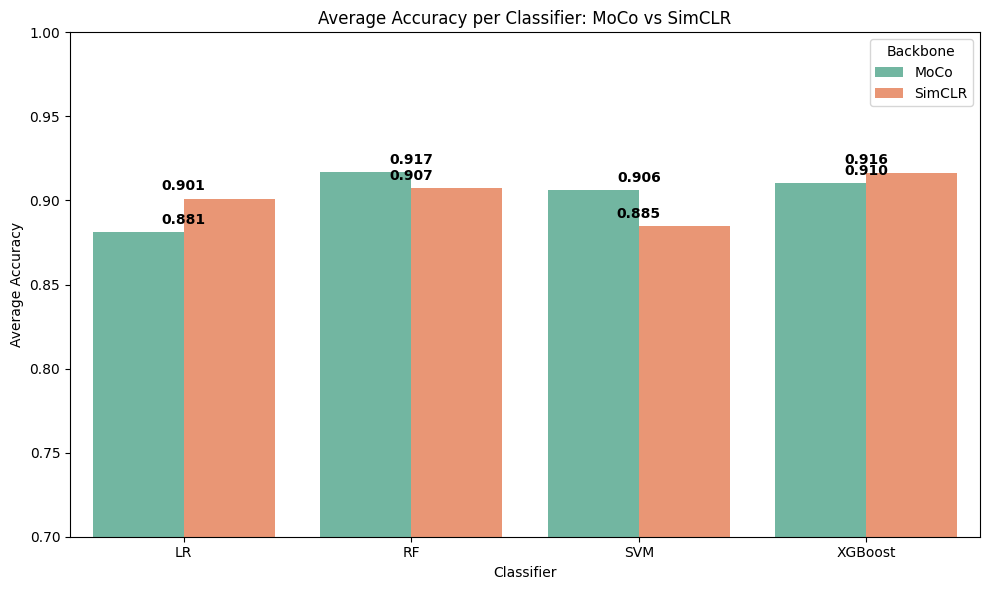

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Compute average accuracy for MoCo
avg_moco = moco_all.groupby('model')['accuracy'].mean().reset_index()
avg_moco['backbone'] = 'MoCo'
avg_moco.rename(columns={'accuracy': 'avg_accuracy'}, inplace=True)

# Step 2: Compute average accuracy for SimCLR
avg_simclr = simclr_all.groupby('model')['accuracy'].mean().reset_index()
avg_simclr['backbone'] = 'SimCLR'
avg_simclr.rename(columns={'accuracy': 'avg_accuracy'}, inplace=True)

# Step 3: Normalize model names (remove "MoCo +", "SimCLR +")
avg_moco['classifier'] = avg_moco['model'].str.replace('MoCo + ', '', regex=False)
avg_simclr['classifier'] = avg_simclr['model'].str.replace('SimCLR + ', '', regex=False)

# Step 4: Combine into one DataFrame
combined_avg = pd.concat([avg_moco, avg_simclr], ignore_index=True)

# Step 5: Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_avg, x='classifier', y='avg_accuracy', hue='backbone', palette='Set2')
plt.title('Average Accuracy per Classifier: MoCo vs SimCLR')
plt.xlabel('Classifier')
plt.ylabel('Average Accuracy')
plt.ylim(0.7, 1)

# Add value labels
for i, row in combined_avg.iterrows():
    plt.text(
        x=i % len(avg_moco), 
        y=row['avg_accuracy'] + 0.005,
        s=f"{row['avg_accuracy']:.3f}", 
        ha='center', 
        fontweight='bold'
    )

plt.legend(title='Backbone')
plt.tight_layout()
plt.show()


Classifier Accuracy by Training Percentage: MoCo vs SimCLR

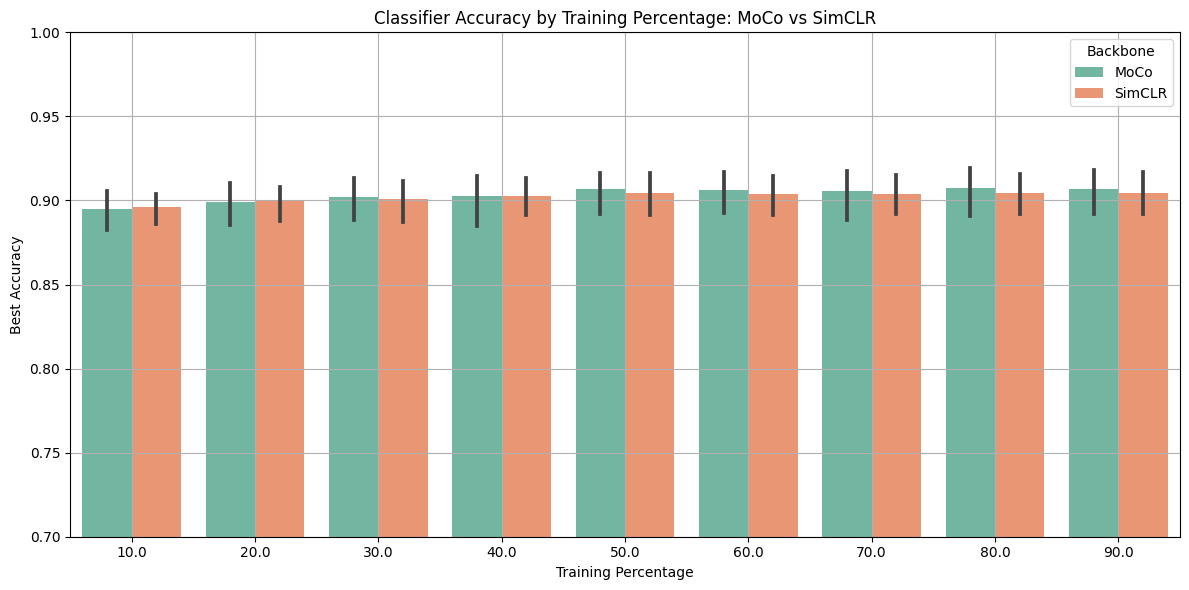

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean model names
moco_all['backbone'] = 'MoCo'
simclr_all['backbone'] = 'SimCLR'

moco_all['classifier'] = moco_all['model'].str.replace('MoCo + ', '', regex=False)
simclr_all['classifier'] = simclr_all['model'].str.replace('SimCLR + ', '', regex=False)

# Step 2: Combine MoCo and SimCLR
combined = pd.concat([moco_all, simclr_all], ignore_index=True)

# Step 3: Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=combined, 
    x='train_pct', 
    y='accuracy', 
    hue='backbone', 
    palette='Set2', 
    dodge=True
)

plt.title('Classifier Accuracy by Training Percentage: MoCo vs SimCLR')
plt.xlabel('Training Percentage')
plt.ylabel('Best Accuracy')
plt.ylim(0.7, 1)
plt.grid(True)
plt.legend(title='Backbone')
plt.tight_layout()
plt.show()

Line Chart Comparing All Classifiers for MoCo & SimCLR

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

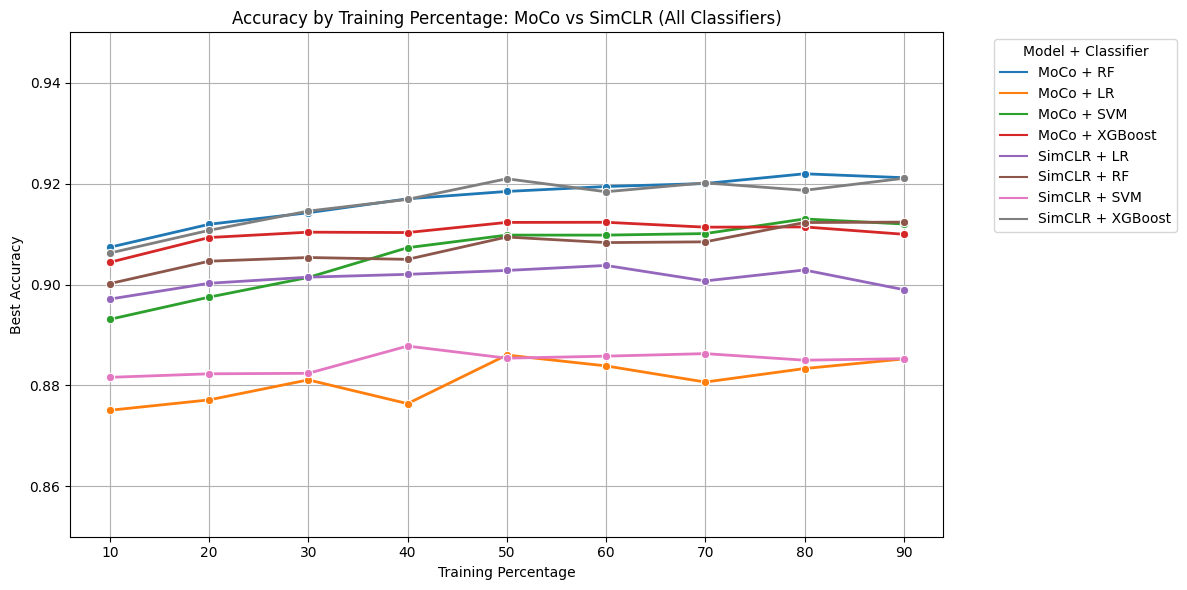

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Add backbone and classifier columns (if not already)
moco_all['backbone'] = 'MoCo'
simclr_all['backbone'] = 'SimCLR'

moco_all['classifier'] = moco_all['model'].str.replace('MoCo + ', '', regex=False)
simclr_all['classifier'] = simclr_all['model'].str.replace('SimCLR + ', '', regex=False)

# Step 2: Combine datasets
combined = pd.concat([moco_all, simclr_all], ignore_index=True)

# Step 3: Create a new column that combines backbone + classifier
combined['model_combo'] = combined['backbone'] + ' + ' + combined['classifier']

# Step 4: Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=combined,
    x='train_pct',
    y='accuracy',
    hue='model_combo',
    marker='o',
    linewidth=2,
    palette='tab10'
)

# Decorate
plt.title("Accuracy by Training Percentage: MoCo vs SimCLR (All Classifiers)")
plt.xlabel("Training Percentage")
plt.ylabel("Best Accuracy")
plt.ylim(0.85, 0.95)
plt.grid(True)
plt.legend(title='Model + Classifier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
BYOL Best

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


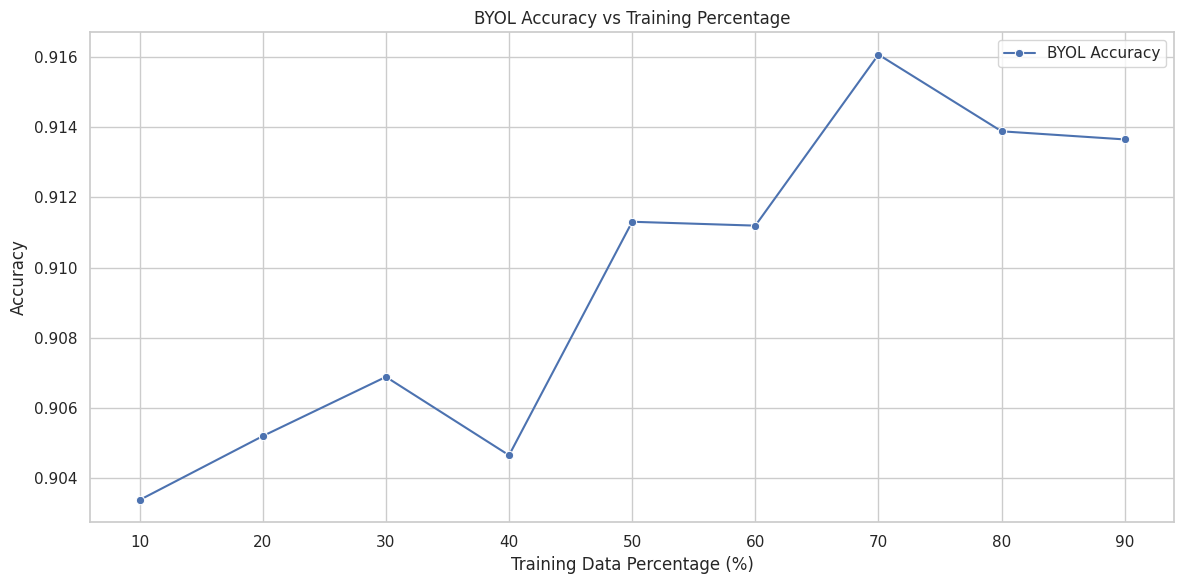

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract only the best accuracy for BYOL from the byol_best DataFrame
byol_best_accuracy = byol_best[['train_pct', 'accuracy']]

# Plot the BYOL best accuracy curve
plt.figure(figsize=(12, 6))
sns.lineplot(data=byol_best_accuracy, x='train_pct', y='accuracy', marker='o', label='BYOL Accuracy')
plt.title("BYOL Accuracy vs Training Percentage")
plt.xlabel("Training Data Percentage (%)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
from IPython.display import display
# Extract the best results for BYOL from the byol_best DataFrame
byol_best_results = byol_best[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1']]

# Display the best BYOL results
print("\nBYOL Best Results:")
display(byol_best)



BYOL Best Results:


,train_pct,test_pct,accuracy,f1_class_0,f1_class_1,model
0,10.0,90.0,0.903379,0.861625,0.925776,BYOL
1,20.0,80.0,0.905200,0.864454,0.927111,BYOL
2,30.0,70.0,0.906887,0.867001,0.928369,BYOL
3,40.0,60.0,0.904653,0.862817,0.926935,BYOL
4,50.0,50.0,0.911307,0.873750,0.931642,BYOL
5,60.0,40.0,0.911196,0.873292,0.931645,BYOL
6,70.0,30.0,0.916069,0.881821,0.934927,BYOL
7,80.0,20.0,0.913884,0.877268,0.933672,BYOL
8,90.0,10.0,0.913653,0.878462,0.933040,BYOL


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

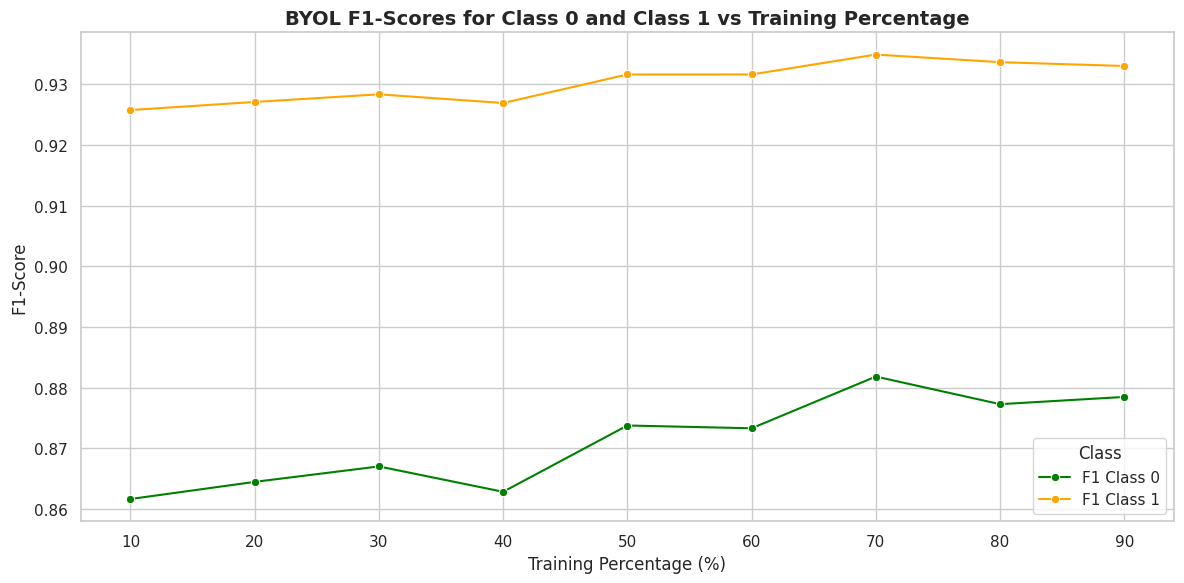

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the relevant columns for BYOL best results
byol_best_results = byol_best[['train_pct', 'f1_class_0', 'f1_class_1']]

# Create the figure for plotting both F1-scores
plt.figure(figsize=(12, 6))

# Plot F1-score for Class 0
sns.lineplot(data=byol_best_results, x='train_pct', y='f1_class_0', marker='o', label='F1 Class 0', color='green')

# Plot F1-score for Class 1
sns.lineplot(data=byol_best_results, x='train_pct', y='f1_class_1', marker='o', label='F1 Class 1', color='orange')

# Add titles and labels
plt.title("BYOL F1-Scores for Class 0 and Class 1 vs Training Percentage", fontsize=14, weight='bold')
plt.xlabel("Training Percentage (%)", fontsize=12)
plt.ylabel("F1-Score", fontsize=12)
plt.legend(title="Class", loc='best')

# Show grid and layout adjustments
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


Dino Best

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


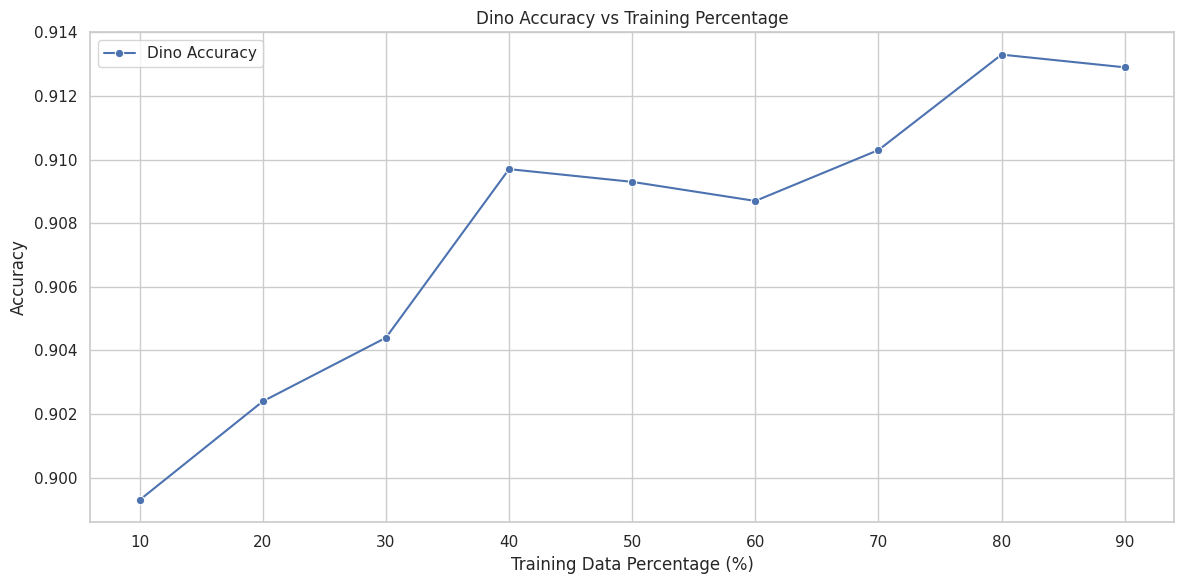

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract only the best accuracy for DINO from the dino_best DataFrame
dino_best_accuracy = dino_best[['train_pct', 'accuracy']]

# Plot the Dino best accuracy curve
plt.figure(figsize=(12, 6))
sns.lineplot(data=dino_best_accuracy, x='train_pct', y='accuracy', marker='o', label='Dino Accuracy')
plt.title("Dino Accuracy vs Training Percentage")
plt.xlabel("Training Data Percentage (%)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


In [65]:
from IPython.display import display
# Extract the best results for DINO from the dino_best DataFrame
dino_best_results = dino_best[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1']]

# Display the best BYOL results
print("\nDINO Best Results:")
display(dino_best)



DINO Best Results:


,train_pct,test_pct,accuracy,f1_class_0,f1_class_1,model
0,10.0,90.0,0.8993,0.8548,0.9229,DINO
1,20.0,80.0,0.9024,0.8595,0.9253,DINO
2,30.0,70.0,0.9044,0.8625,0.9267,DINO
3,40.0,60.0,0.9097,0.8712,0.9304,DINO
4,50.0,50.0,0.9093,0.8704,0.9302,DINO
5,60.0,40.0,0.9087,0.8696,0.9298,DINO
6,70.0,30.0,0.9103,0.8716,0.9311,DINO
7,80.0,20.0,0.9133,0.8771,0.9331,DINO
8,90.0,10.0,0.9129,0.8761,0.9329,DINO


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

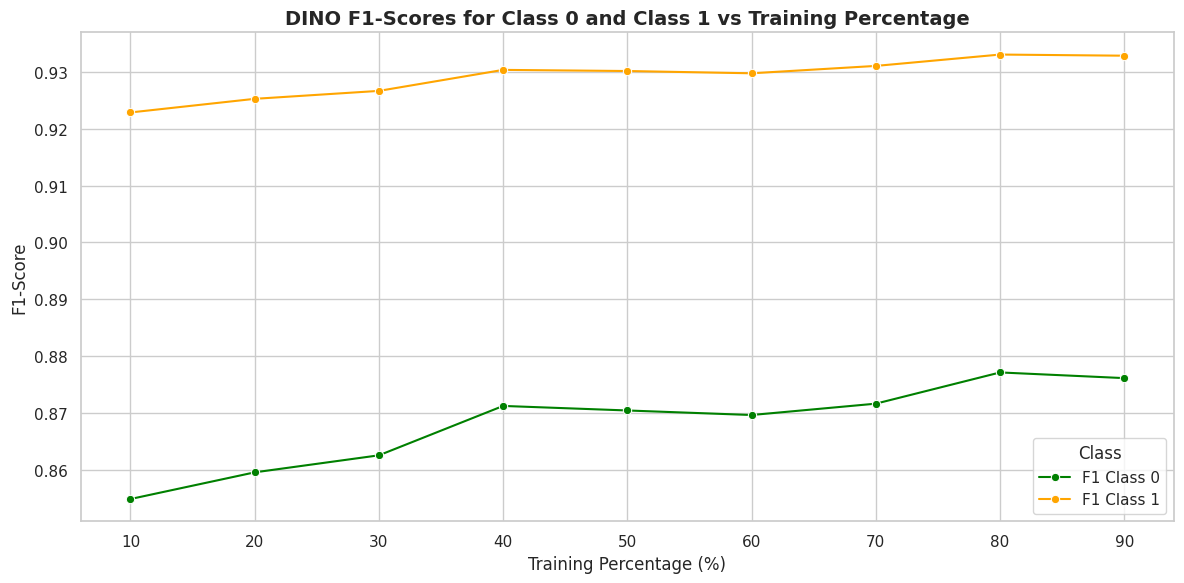

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the relevant columns for DINO best results
dino_best_results = dino_best[['train_pct', 'f1_class_0', 'f1_class_1']]

# Create the figure for plotting both F1-scores
plt.figure(figsize=(12, 6))

# Plot F1-score for Class 0
sns.lineplot(data=dino_best_results, x='train_pct', y='f1_class_0', marker='o', label='F1 Class 0', color='green')

# Plot F1-score for Class 1
sns.lineplot(data=dino_best_results, x='train_pct', y='f1_class_1', marker='o', label='F1 Class 1', color='orange')

# Add titles and labels
plt.title("DINO F1-Scores for Class 0 and Class 1 vs Training Percentage", fontsize=14, weight='bold')
plt.xlabel("Training Percentage (%)", fontsize=12)
plt.ylabel("F1-Score", fontsize=12)
plt.legend(title="Class", loc='best')

# Show grid and layout adjustments
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
